In [1]:
import math
import random
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
random.seed(10)

In [2]:
import pickle
from pathlib import Path

# Structure: (theta, phi) -> (theta_etilt, phi_scan)
saved_tp = dict()
saved_tp_file = Path("t0p0.pkl")
if saved_tp_file.is_file():
    with open(saved_tp_file, "rb") as f:
        saved_tp = pickle.load(f)
        
# Structure: (segment, polygon) -> (boolean True or False)
saved_los = dict()

saved_los_file = Path("los.pkl")
if saved_los_file.is_file():
    with open(saved_los_file, "rb") as f:
        saved_los = pickle.load(f)

In [3]:
!pip install Geometry3D shapely

In [4]:
from Geometry3D import *
from shapely import geometry

In [5]:
data = pd.read_csv("C:\\Users\\tniloy\\Downloads\\opencellid dataset\\310.csv", names=['radio', 'mcc', 'mnc', 'lac', 'cid', 'unit', 'longitude', 'latitude', 'range', 'samples', 'changeable', 'created', 'updated', 'averageSignal'])

In [6]:
data.head (10)

,radio,mcc,mnc,lac,cid,unit,longitude,latitude,range,samples,changeable,created,updated,averageSignal
0,GSM,310,260,32192,22568,0,-73.858566,40.898438,1779,12,1,1459696254,1489125559,0
1,GSM,310,260,22629,61562,0,-95.876501,41.286475,3367,17,1,1459810860,1609205988,0
2,GSM,310,260,51052,44152,0,-71.084483,42.381728,1000,44,1,1459812328,1514115939,0
3,GSM,310,260,51051,40311,0,-71.085559,42.381356,1000,52,1,1459812328,1527695374,0
4,GSM,310,260,5973,60092,0,-95.570630,29.735371,1000,22,1,1459692332,1490851584,0
5,GSM,310,410,19007,7133,0,-87.258205,40.153886,19135,6,1,1459699529,1472415099,0
6,GSM,310,410,53005,50671,0,-95.563889,30.280380,1000,1,1,1459775023,1459775023,0
7,GSM,310,260,46136,15418,0,-76.999741,39.160080,1000,1,1,1459663271,1459663271,0
8,GSM,310,410,27672,59021,0,-81.741964,26.213691,1000,11,1,1459687298,1491031828,0
9,GSM,310,260,5973,50942,0,-95.560226,29.736557,1000,6,1,1459692332,1469493454,0


In [7]:
# center_x = 0
# center_y = 0
# center_z = 0
# FSS POsition:
lat_FSS= 37.20250
lon_FSS= -80.43444
R  = 6.371e6  #Radius of the earth

x_FSS = R * math.cos(math.radians(lat_FSS)) * math.cos(math.radians(lon_FSS))
y_FSS = R * math.cos(math.radians(lat_FSS)) * math.sin(math.radians(lon_FSS))
z_FSS = R * math.sin(math.radians(lat_FSS))

print("X, Y, Z = "+ str([x_FSS, y_FSS, z_FSS]))


radius=5000 #radius of the inclusion zone
latitude_range = radius / 110574
longitude_range = radius/(111320*math.cos(math.radians(latitude_range)))
print("Total area of inclusion zone is = " + str(radius*radius*math.pi))

X, Y, Z = [843264.3231973607, -5003968.368478095, 3852122.3823358943]
Total area of inclusion zone is = 78539816.33974482


In [8]:
print(latitude_range)
print(longitude_range)

0.04521858664785573
0.044915572737550945


In [9]:
data_within_zone = data[(data['radio'] == 'GSM') & (data['longitude'] <= (lon_FSS + longitude_range)) & (data['longitude'] >= (lon_FSS - longitude_range)) & (data['latitude'] <= (lat_FSS + latitude_range)) & (data['latitude'] >= (lat_FSS - latitude_range))]

data_within_zone.head(10)

,radio,mcc,mnc,lac,cid,unit,longitude,latitude,range,samples,changeable,created,updated,averageSignal
780410,GSM,310,260,37630,43582,0,-80.393175,37.196127,8733,3992,1,1413757287,1435049916,0
1813932,GSM,310,260,32453,43561,0,-80.421524,37.189560,1000,9,1,1458834001,1491931840,0
1813934,GSM,310,260,32453,43602,0,-80.410309,37.233810,1000,6,1,1458834001,1479555225,0
1814053,GSM,310,260,32453,43822,0,-80.406704,37.227516,1000,8,1,1458834001,1479576548,0
1814075,GSM,310,260,32453,43583,0,-80.461073,37.203233,2207,15,1,1458834001,1477155991,0
1814213,GSM,310,260,32453,43581,0,-80.409897,37.217972,1000,5,1,1458834001,1473235293,0
1814220,GSM,310,260,32453,43601,0,-80.425186,37.236099,1000,6,1,1458834001,1473191254,0
1814361,GSM,310,260,32453,43562,0,-80.391645,37.165063,1000,11,1,1458834001,1489446412,0
1814366,GSM,310,260,32453,43603,0,-80.425415,37.222710,1000,4,1,1458834001,1474352285,0
1814368,GSM,310,260,32453,43621,0,-80.393486,37.224279,1033,56,1,1458834001,1482422269,0


In [10]:
len(data_within_zone)

33

In [11]:
import json
with open ('C:\\Users\\tniloy\\Downloads\\export (1).geojson') as f:
    df=json.load(f)
    data1=pd.json_normalize(df,record_path=['features'])
data1.head(10)

,type,id,properties.@id,properties.addr:housenumber,properties.addr:street,properties.building,properties.height,properties.name,properties.operator,properties.type,...,properties.automatic_door,properties.access,properties.button_operated,properties.door,properties.operator:short,properties.operator:type,properties.operator:wikidata,properties.operator:wikipedia,properties.foot,properties.vehicle
0,Feature,relation/308029,relation/308029,630,Washington Street Southwest,dormitory,15.7,Pritchard Hall,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,relation/548333,relation/548333,NaN,NaN,yes,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,relation/548339,relation/548339,NaN,NaN,yes,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,relation/548344,relation/548344,1406,Giles Road,church,NaN,Blacksburg First Wesleyan Church,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,relation/548347,relation/548347,NaN,NaN,yes,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Feature,relation/548348,relation/548348,NaN,NaN,residential,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Feature,relation/548371,relation/548371,1416,Palmer Drive,detached,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Feature,relation/548372,relation/548372,900,Dickerson Lane,detached,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Feature,relation/548373,relation/548373,NaN,NaN,yes,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Feature,relation/548386,relation/548386,NaN,NaN,yes,NaN,NaN,NaN,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data1[data1["properties.height"].notnull()].head(20)

,type,id,properties.@id,properties.addr:housenumber,properties.addr:street,properties.building,properties.height,properties.name,properties.operator,properties.type,...,properties.automatic_door,properties.access,properties.button_operated,properties.door,properties.operator:short,properties.operator:type,properties.operator:wikidata,properties.operator:wikipedia,properties.foot,properties.vehicle
0,Feature,relation/308029,relation/308029,630,Washington Street Southwest,dormitory,15.7,Pritchard Hall,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Feature,relation/1360465,relation/1360465,NaN,NaN,university,14.86,East Eggleston Hall,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Feature,relation/1360466,relation/1360466,NaN,NaN,dormitory,14.86,West Eggleston Hall,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Feature,relation/1360467,relation/1360467,NaN,NaN,dormitory,11.27,Slusher Wing,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Feature,relation/1360468,relation/1360468,NaN,NaN,dormitory,33.59,Slusher Tower,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Feature,relation/1360469,relation/1360469,NaN,NaN,dormitory,14.86,Main Eggleston Hall,Virginia Tech,multipolygon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Feature,way/26210227,way/26210227,NaN,NaN,university,15.47,Cheatham Hall,Virginia Tech,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Feature,way/26210236,way/26210236,285,Ag Quad Lane,university,11.57,Dietrick Hall,Virginia Tech,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Feature,way/32709325,way/32709325,570,Washington Street Southwest,dormitory,25.82,Hoge Hall,Virginia Tech,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Feature,way/32953606,way/32953606,210,Drillfield Drive,university,11.61,Sandy Hall,Virginia Tech,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data1["geometry.coordinates"].head(10)

0    [[[-80.4194702, 37.2238774], [-80.4194505, 37....
1    [[[-80.4070717, 37.2320238], [-80.4069865, 37....
2    [[[-80.4068521, 37.2319488], [-80.4069373, 37....
3    [[[-80.4104274, 37.2506844], [-80.4104412, 37....
4    [[[-80.4355296, 37.2138316], [-80.4355103, 37....
5    [[[-80.4416012, 37.2238365], [-80.4417281, 37....
6    [[[-80.3924701, 37.2185727], [-80.3923812, 37....
7    [[[-80.4121293, 37.2397986], [-80.4121648, 37....
8    [[[-80.4075916, 37.2253453], [-80.4076676, 37....
9    [[[-80.4071473, 37.2322051], [-80.4072218, 37....
Name: geometry.coordinates, dtype: object

In [14]:
class Building:
    def __init__(self, coordinates=None, height=None):
        self.coordinates = []
        if coordinates is not None:
            self.coordinates = coordinates
        
        if height is None or not str(height).isdigit():
            self.height = random.uniform(10, 40)
        else:
            self.height = height
        
        self.x_coord, self.y_coord, self.z_coord = self.latlon_to_XYZ()
        
        self.points = []
        for i in range(len(self.x_coord)):
            x, y, z = self.x_coord[i], self.y_coord[i], self.z_coord[i]
            self.points.append(Point(x,y,z))
        
        self.xy_points = np.array([(p.x, p.y) for p in self.points])
        self.xy_polygon = geometry.Polygon(self.xy_points)
        
        self.wall_polygons = self.get_wall_polygons()
    
    def latlon_to_XYZ(self):
        x_coord = np.array([])
        y_coord = np.array([])
        z_coord = np.array([])
        
        # bottom points of building at each coordinate
        for lon, lat in self.coordinates:
            x = R * math.cos(math.radians(lat)) * math.cos(math.radians(lon))
            y = R * math.cos(math.radians(lat)) * math.sin(math.radians(lon))
            x_coord = np.append(x_coord, x)
            y_coord = np.append(y_coord, y)
            z_coord = np.append(z_coord, 0)
            # z_coord = np.append(z_coord, self.height)
            
        # make coordinates to relative to FSS position
        x_coord -= x_FSS
        y_coord -= y_FSS
        
        return x_coord, y_coord, z_coord

    def get_wall_polygons(self):
        polygons = []

        # points = [Point(x,y,0) for x,y in p.boundary.coords]
        # polygons.append(ConvexPolygon(points))
        points = [Point(x,y,self.height) for x,y in self.xy_polygon.boundary.coords]
        # polygons.append(ConvexPolygon(points))

        for i in range(len(points)-1):
            high_point_1 = points[i]
            high_point_2 = points[i + 1]
            low_point_1 = Point(high_point_1.x, high_point_1.y, 0)
            low_point_2 = Point(high_point_2.x, high_point_2.y, 0)

            poly_points = [low_point_1, low_point_2, high_point_1, high_point_2]
            #print(poly_points)
            polygons.append(ConvexPolygon(poly_points))
            
        return polygons
        

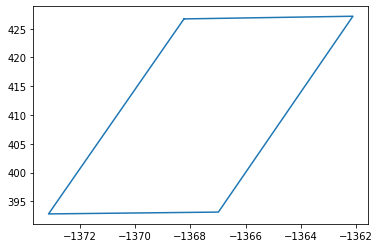

In [15]:
from shapely import geometry

b = Building(data1.iloc[500]["geometry.coordinates"][0], data1.iloc[500]["properties.height"])
x, y = b.xy_polygon.boundary.xy
plt.plot(x, y)

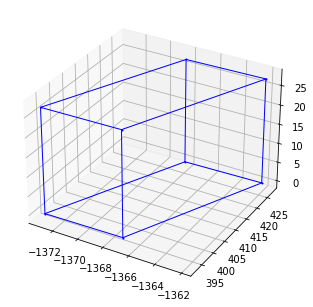

In [16]:
r = Renderer(backend='matplotlib')
for p in b.wall_polygons:
    r.add((p,'b',1),normal_length=0)
r.show()

In [ ]:
from tqdm import tqdm
buildings = []

for i in tqdm(range(len(data1))):
    for coords in data1.iloc[i]["geometry.coordinates"]:
        try:
            buildings.append(Building(coords, data1.iloc[i]["properties.height"]))
        except:
            print(f"Skipping building {i}")

  0%|▎                                                                               | 36/8644 [00:00<01:49, 78.45it/s]

Skipping building 26
Skipping building 26
Skipping building 27
Skipping building 27
Skipping building 27
Skipping building 28
Skipping building 28
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29
Skipping building 29


  1%|▋                                                                               | 69/8644 [00:00<01:49, 78.24it/s]

Skipping building 53
Skipping building 53
Skipping building 53
Skipping building 53


 80%|█████████████████████████████████████████████████████████████▍               | 6897/8644 [00:37<00:08, 198.51it/s]

In [ ]:
class FSS_Channels:
  # channels start at 0, so a channel plan with 8 channels is from 0 to 7

  band_width = 240e6 # 240MHz

  # 10.7-12.7 GHz frequency range
  range_start = 10.7e9 # 10.7GHz
  range_end = 12.7e9 # 12.7GHz

  channel_count = 8

  range_size = range_end - range_start
  unused_space = range_size - band_width * channel_count

  # FSS channel spacing should be 10MHz
  space_between_channels = unused_space / channel_count

  @staticmethod
  def getChannelRange(channel) -> Tuple[int, int]:
    channel_start = int((0.5 + channel) * FSS_Channels.space_between_channels + channel * FSS_Channels.band_width)
    channel_end = channel_start + FSS_Channels.band_width
    return channel_start, channel_end

  def __init__(channel):
    self.channel = channel

In [ ]:
class BS_Channels:
  # channels start at 1, so a channel plan with 5 channels is from 1 to 5

  band_width = 100e6 # 100MHz

  # 12.2-12.7 GHz frequency range
  range_start = 12.2e9 # 12.2GHz
  range_end = 12.7e9 # 12.7GHz

  channel_count = 5

  range_size = range_end - range_start
  unused_space = range_size - band_width * channel_count

  # BS channel spacing should be 0MHz
  space_between_channels = unused_space / channel_count

  @staticmethod
  def getChannelRange(channel) -> Tuple[int, int]:
    channel -= 1
    
    channel_start = int((0.5 + channel) * BS_Channels.space_between_channels + channel * BS_Channels.band_width)
    channel_end = channel_start + BS_Channels.band_width
    return channel_start, channel_end

  def __init__(channel):
    self.channel = channel

In [ ]:
class BS:
  def __init__(self, radius, max_height, carr_freq, interference_type):
    self.radius = radius
    self.max_height = max_height
    self.carr_freq = carr_freq
    self.interference_type = interference_type
    self.base_heights = {
        'UMi': 10,
        'UMa': 25,
        'RMa': 35,
        None: random.randint(10, 35)
    }
    self.BS_x = random.randint(-4000,4000) + 1000*random.random()
    self.BS_y = random.randint(-4000,4000) + 1000*random.random()
    self.BS_z = self.base_heights[self.interference_type]

  def BS_random_co_ordinates(self):
    return self.BS_x, self.BS_y, self.BS_z
 
  def UE_random_co_ordinates(self):
    UE_x = random.randint(-4000,4000) + 1000*random.random()
    UE_y = random.randint(-4000,4000) + 1000*random.random()
    UE_z = random.uniform(0,1.5)
    
    return UE_x, UE_y, UE_z

# Creating the FSS class
  def FSS_random_co_ordinates(self):

    FSS_x = random.randint(-4000,4000) + 1000*random.random()
    FSS_y = random.randint(-4000,4000) + 1000*random.random()
    FSS_z = random.choice([1.5,4.5])
    
    return FSS_x, FSS_y, FSS_z


In [ ]:
def path_loss_UMi(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+((FSS_Y-BS_Y)**2)+((FSS_Z-BS_Z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log10(d_3D)+20*math.log10(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log10(d_3D)+20*math.log10(fc)-9.5*math.log10((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log10(d_3D)+22.4+21.3*math.log10(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
    line_of_sight = True
    
##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_UMi = PLUMiNLOS
                    line_of_sight = False
                else:
                    path_loss_UMi = PLUMiLOS
#                     line_of_sight = True
    
 # intersection(line, polygon): [Intersection], None
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_UMi = PLUMiNLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_UMi = PLUMiLOS
#                 line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False
    
# #Loss Probability:
#     if d_2D>18:
#         PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))     
#     else:
#         PrLosUmi=1 ##d_2d<=18     
#     if PrLosUmi > random.random():
#         path_loss_UMi = PLUMiLOS   
#     else:
#         path_loss_UMi = PLUMiNLOS   
##path_loss 
#     path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi, d_2D, line_of_sight

In [ ]:
def path_loss_UMa(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+(FSS_Y- BS_Y)**2)+((FSS_Z-BS_Z)**2)
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log10(d_3D)+20*math.log10(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log10(d_3D)+20*math.log10(fc)-9*math.log10((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and d_2D<=5000:
         PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log10(d_3D)+20*math.log10(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)
    
    line_of_sight = True

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)


##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_UMa = PLUMANLOS
                    line_of_sight = False
                else:
                    path_loss_UMa = PLUMALOS
#                     line_of_sight = True
                
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_UMa = PLUMANLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_UMa = PLUMALOS
#                 line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False


##Loss Probability:
#     if d_2D >18:
#         if hUT<=13:
#             ChUT=0
#         elif 13<hUT and hUT<=23:
#             ChUT=((hUT-13)/10)**1.5  
#         PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))
#     else:##18m<d_2D:
#         PrLOSUma=1
        
#     if PrLOSUma > random.random():
#         path_loss_UMa = PLUMALOS
    
#     else:
#         path_loss_UMa = PLUMANLOS
    
##Path Loss
#     path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa, d_2D, line_of_sight

In [ ]:
def path_loss_RMa(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((FSS_X-BS_X)**2)+((FSS_Y- BS_Y)**2)+((FSS_Z-BS_Z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log10((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log10(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log10(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log10(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLRMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log10(W)+7.5*math.log10(h)-(24.37-3.7*(h/hBs)**2)*math.log10(hBs)+(43.42-3.1*math.log10(hBs))*(math.log10(d_3D)-3)+20*math.log10(fc)-(3.2*(math.log10(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)
    
    line_of_sight = True
    
##realistic pathloss:
    bs_to_fss_segment = Segment(Point(BS_X, BS_Y, BS_Z), Point(FSS_X, FSS_Y, FSS_Z))
    for i in tqdm(range(len(buildings))):
#     for i in range(len(buildings)):
        for polygon in buildings[i].wall_polygons:
            if (hash(bs_to_fss_segment), hash(polygon)) in saved_los:
                if saved_los.get((hash(bs_to_fss_segment), hash(polygon))):
                    path_loss_RMa = PLRMANLOS
                    line_of_sight = False
                else:
                    path_loss_RMa = PLRMALOS
                    # line_of_sight = True
   
            elif intersection(bs_to_fss_segment, polygon) is not None:
                path_loss_RMa = PLRMANLOS
                line_of_sight = False
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = True
            else:
                path_loss_RMa = PLRMALOS
                # line_of_sight = True
                saved_los[(hash(bs_to_fss_segment), hash(polygon))] = False
                
    

# ##Loss Probability:
#     if d_2D>10:
#         PrLOSrma=math.exp(-((d_2D-10)/1000))
        
# ## 10m<d_2D:
#     else:
#         PrLOSrma=1
        
#     if PrLOSrma > random.random():
#         path_loss_RMa= PLRMALOS
    
#     else:
#         path_loss_RMa = PLRMANLOS

##PathLoss:
#     path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa, d_2D,  line_of_sight

In [ ]:
def Interface_UMi_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_UMi,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        # theta_tilt, phi_scan = max_gain_5g_parameters(theta, phi)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)

        TXPower=41.3
#         LBuildingLoss=1
        interface1=TXPower+ G_5G_R-pathloss_UMi- LBodyLoss + G_Rx_5G
        return interface1,pathloss_UMi

In [ ]:
def Interface_UMa_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_UMa,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        # if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)
        
        TXPower=41.3
#         LBuildingLoss=1
        interface2=TXPower+ G_5G_R-pathloss_UMa- LBodyLoss + G_Rx_5G
        return interface2,pathloss_UMa

In [ ]:
def Interface_RMa_1(BS_X,BS_Y,BS_Z,FSS_X,FSS_Y,FSS_Z,FSS_phi,pathloss_RMa,theta_tilt,phi_scan,output=False):
        LBodyLoss=4
#         LSpectralOverlap=10*math.log(10)
        x, y, z = BS_X-FSS_X, BS_Y-FSS_Y, BS_Z-FSS_Z

        theta_bs_es = math.degrees(math.atan(y/x)) % 360
        phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
        # if output: print("theta_bs_es:", theta_bs_es, "phi_bs_es:", phi_bs_es)
        fss_phi_difference = abs(FSS_phi - phi_bs_es)
        if output: print("fss_phi_difference:", fss_phi_difference)

        G_5G_R=gain_5g(theta_bs_es, phi_bs_es, theta_tilt, phi_scan)
        G_Rx_5G=gain_fss_wbes_b(fss_phi_difference)
        
        TXPower=41.3
#         LBuildingLoss=1
        interface3=TXPower+ G_5G_R-pathloss_RMa-LBodyLoss + G_Rx_5G
        return interface3,pathloss_RMa

In [ ]:
k = 1.38064852*10**(-23)
T=200
B=240e6
Noise = 10*math.log10(k*T*B)
Noise_W = 10 ** (Noise / 10)
print('Noise:', Noise)
print('Noise in Watts:', Noise_W)

In [ ]:
bs_ue_max_radius = 1000
bs_ue_min_radius= 1
base_station_count=33

fss1 = BS(radius, max_height=1.5, carr_freq=12e3, interference_type=None)
x,y,z = 0,0,0

FSS_phi = {
    'UMi': 15,
    'UMa': 48,
    'RMa': 5
}
        
def simulate(output=True):
    FSS_X=np.array([])
    FSS_Y=np.array([])
    FSS_Z=np.array([])
    FSS_CHANNELS = []
    for i in range (1):
        FSS_X = np.append(FSS_X, x)
        FSS_Y = np.append(FSS_Y, y)
        FSS_Z = np.append(FSS_Z, z)
        # 0 means not in use, 1 means in use
        channel_status = [random.randint(0, 1) for i in range(FSS_Channels.channel_count)]
        channels_used = np.array([i for i in range(FSS_Channels.channel_count) if channel_status[i] == 1])
        FSS_CHANNELS.append(channels_used)
        if output: print("FSS Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z) + ", channel: " + str(channels_used))
    if output: print(FSS_X, FSS_Y, FSS_Z, FSS_CHANNELS)

    # Create base stations
    BS_X=np.array([])
    BS_Y=np.array([])
    BS_Z=np.array([])
    
    # Randomly select base stations 
    # base_station_indexes = random.sample(range(len(data_within_zone)), base_station_count)

    # for i in base_station_indexes:
    for i in range(base_station_count):
        lat_BS, lon_BS = data_within_zone.iloc[i]['latitude'], data_within_zone.iloc[i]['longitude']
        bs1 = BS(radius, max_height=35, carr_freq=12e3, interference_type=None)
        x_BS = R * math.cos(math.radians(lat_BS)) * math.cos(math.radians(lon_BS))
        y_BS = R * math.cos(math.radians(lat_BS)) * math.sin(math.radians(lon_BS))
#         z_BS = R * math.sin(math.radians(lat_BS))

        BS_X = np.append(BS_X, x_BS - x_FSS)
        BS_Y = np.append(BS_Y, y_BS - y_FSS)
        BS_Z = np.append(BS_Z, 0)
        if output: print("Bs Co-ordinates=" +str (x_BS)+ "," + str(y_BS)+ "," + str(z_BS))
    
    if output: print(BS_X,BS_Y,BS_Z)

    # Create user equipment
    UE_X=np.array([])
    UE_Y=np.array([])
    UE_Z=np.array([])
    UE_CHANNEL=np.array([])
    for p in range (len(BS_X)):
        for i in range(33):
    # number of split regions
    # i is the sector number
            for j in range(10):
      # number of UEs per region
      # j is the number of the UE in one sector
                bs_x, bs_y, bs_z = BS_X[p], BS_Y[p],BS_Z[p]
                theta_bs_ue = random.uniform(120 * i, 120 * (i+1))
                # 0-120, 120-240, 240-360
                radius_bs_ue = random.uniform(bs_ue_min_radius, bs_ue_max_radius)

                x1 = bs_x + radius_bs_ue * math.cos(math.radians(theta_bs_ue))
                y1 = bs_y + radius_bs_ue * math.sin(math.radians(theta_bs_ue))

                UE_X = np.append(UE_X, x1)
                UE_Y = np.append(UE_Y, y1)
                UE_Z = np.append(UE_Z, 1.5)

                maximum_UEs_per_channel = 4

                if j > maximum_UEs_per_channel * BS_Channels.channel_count:
                    raise Exception(f"BS cannot support {j} UEs")

                count = {i: 0 for i in range(1, BS_Channels.channel_count + 1)}

                channel = random.randint(1, BS_Channels.channel_count)

                while count[channel] >= maximum_UEs_per_channel:
                    channel = random.randint(1, BS_Channels.channel_count)

                count[channel] += 1

                UE_CHANNEL = np.append(UE_CHANNEL, channel)

                if output: print("UE Co-ordinates=" +str (x1)+ "," + str(y1)+ "," + str(z1) + ", channel: " + str(channel))
            if output: print(UE_X,UE_Y,UE_Z)
        
    pathloss_UMa=np.empty([0])
    pathloss_UMi=np.empty([0])
    pathloss_RMa=np.empty([0])
    distance_UMa=np.empty([0])
    distance_UMi=np.empty([0])
    distance_RMa=np.empty([0])
    line_of_sight=np.empty([0])
    for i in range(len(BS_X)):
        for j in range (len(FSS_X)):
            pathlossumi,distance,los_single = path_loss_UMi(BS_X[i],BS_Y[i],10,FSS_X[j],FSS_Y[j],FSS_Z[j])
            pathlossuma,distance,los_single = path_loss_UMa(BS_X[i],BS_Y[i],25,FSS_X[j],FSS_Y[j],FSS_Z[j])
            pathlossrma,distance,los_single = path_loss_RMa(BS_X[i],BS_Y[i],35,FSS_X[j],FSS_Y[j],FSS_Z[j])
            if output: print("pathloss umi:", pathlossumi, "uma:", pathlossuma, "rma:", pathlossrma, "for distance", distance)
            
            pathloss_UMa=np.append(pathloss_UMa,pathlossuma)
            distance_UMa=np.append(distance_UMa,distance)
            pathloss_UMi=np.append(pathloss_UMi,pathlossumi)
            distance_UMi=np.append(distance_UMi,distance)
            pathloss_RMa=np.append(pathloss_RMa,pathlossrma)
            distance_RMa=np.append(distance_RMa,distance)
            
            line_of_sight=np.append(line_of_sight,los_single)
            

    if output: print(pathloss_UMi,distance_UMi)
    if output: print(pathloss_UMa,distance_UMa)
    if output: print(pathloss_RMa,distance_RMa)

    interface_UMi_W=np.empty([0])
    interface_UMa_W=np.empty([0])
    interface_RMa_W=np.empty([0])
    for i in range(len(BS_X)):
        interface_UMi_BS=np.empty([0])
        interface_UMa_BS=np.empty([0])
        interface_RMa_BS=np.empty([0])
        for j in range(len(FSS_X)):
            if output: print(f"BS {i}, FSS {j}, pathloss {i*len(FSS_X)+j}")
            for k in range(len(UE_X)):
                # channel check
                # if UE is using channel 1, the start is 12.2GHz and the end is 12.3GHz
                bs_channel_start, bs_channel_end = BS_Channels.getChannelRange(UE_CHANNEL[k])
                bs_channel_range = range(bs_channel_start, int(bs_channel_end + (5e6)), int(5e6))

                interference_found = False

                for fss_channel in FSS_CHANNELS[j]:
                    # if fss_channel >= 6:
                    fss_channel_start, fss_channel_end = FSS_Channels.getChannelRange(fss_channel)
                    fss_channel_range = range(bs_channel_start, int(bs_channel_end + (5e6)), int(5e6))
                    
                    bs_set = set(bs_channel_range)
                    if len(bs_set.intersection(fss_channel_range)):
                        interference_found = True

                if not interference_found:
#                     interface_UMi_W=np.append(interface_UMi_W,0)
#                     interface_UMa_W=np.append(interface_UMa_W,0)
#                     interface_RMa_W=np.append(interface_RMa_W,0)
                    continue

                for interference_type in ["UMi", "UMa", "RMa"]:
                    if interference_type == "UMi":
                        BS_Z = np.array([10 for i in range(len(BS_X))])
                    elif interference_type == "UMa":
                        BS_Z = np.array([25 for i in range(len(BS_X))])
                    elif interference_type == "RMa":
                        BS_Z = np.array([35 for i in range(len(BS_X))])
                    # bs_ue_x, bs_ue_y, bs_ue_z = BS_X-UE_X, BS_Y-UE_Y, BS_Z-UE_Z
                    bs_ue_x, bs_ue_y, bs_ue_z = UE_X[k]-BS_X[i], UE_Y[k]-BS_Y[i], UE_Z[k]-BS_Z[i]

                    theta_bs_ue = np.arctan(bs_ue_y/bs_ue_x)
                    phi_bs_ue = np.sqrt(bs_ue_x**2 + bs_ue_y**2) / bs_ue_z

                    theta_bs_ue = np.degrees(theta_bs_ue) % 360
                    phi_bs_ue = np.degrees(phi_bs_ue) % 360
                    if output: print("theta_bs_ue:", theta_bs_ue, "phi_bs_ue:", phi_bs_ue)

                    theta_tilt, phi_scan = max_gain_5g_parameters(theta_bs_ue, phi_bs_ue)
                    

                    if interference_type == "UMi":
                        interfaceumi,pathloss_UMi_x= Interface_UMi_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['UMi'],pathloss_UMi[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        if output: print("interference umi:", interfaceumi, "pathloss:", pathlossumi)
                        interface_UMi_BS=np.append(interface_UMi_BS,interfaceumi)
                    elif interference_type == "UMa":
                        interfaceuma,pathloss_UMa_x= Interface_UMa_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['UMa'],pathloss_UMa[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        if output: print("interference uma:", interfaceuma, "pathloss:", pathlossuma)
                        interface_UMa_BS=np.append(interface_UMa_BS,interfaceuma)
                    elif interference_type == "RMa":
                        interfacerma,pathloss_RMa_x= Interface_RMa_1(BS_X[i],BS_Y[i],BS_Z[i],FSS_X[j],FSS_Y[j],FSS_Z[j],FSS_phi['RMa'],pathloss_RMa[i*len(FSS_X)+j],theta_tilt,phi_scan)
                        if output: print("interference rma:", interfacerma, "pathloss:", pathlossrma)
                        interface_RMa_BS=np.append(interface_RMa_BS,interfacerma)
        interface_UMi_W = np.append(interface_UMi_W, np.sum(10 ** (interface_UMi_BS / 10)))
        interface_UMa_W = np.append(interface_UMa_W, np.sum(10 ** (interface_UMa_BS / 10)))
        interface_RMa_W = np.append(interface_RMa_W, np.sum(10 ** (interface_RMa_BS / 10)))
              
    if output: print(interface_UMi_W,pathloss_UMi)
    if output: print(interface_UMa_W,pathloss_UMa)
    if output: print(interface_RMa_W,pathloss_RMa)

    # I_N_UMi = np.array([interfaceumi-Noise for interfaceumi in interface_UMi])
    I_N_UMi = interface_UMi_W / Noise_W
    if output: print('I/N UMi:', I_N_UMi)
    I_N_UMa = interface_UMa_W / Noise_W
    if output: print('I/N UMa:', I_N_UMa)      
    I_N_RMa = interface_RMa_W / Noise_W
    if output: print('I/N RMa:', I_N_RMa)  

    return distance_RMa, I_N_RMa, distance_UMa, I_N_UMa, distance_UMi, I_N_UMi, line_of_sight
        

In [ ]:
# Prototype functions to calculate antenna gain of 5G base station and FSS earth station

import math, cmath
from scipy import optimize

# gain is in dBi

# 3GPP TR 38.901
# https://www.etsi.org/deliver/etsi_tr/138900_138999/138901/14.00.00_60/tr_138901v140000p.pdf
antenna_gain_max = 8

# values recommended by Dr. Zoheb
rows = 16  # Nv
cols = 16  # Nh
hspace = 0.5  # dh/λ
vspace = 0.5  # dv/λ

# constant values based on ECC Rep 281
phi_3db = 80  # degrees
theta_3db = 65  # degrees
front_to_back_ratio = 30  # dB
side_lobe_level_limit = 30  # dB

# antenna horizontal pattern
def gain_antenna_element_horizontal(phi) -> float:
    return -min(
                12 * (phi / phi_3db)**2, 
                front_to_back_ratio
            )

# antenna vertical pattern
def gain_antenna_element_vertical(theta) -> float:
    return -min(
                12 * ((theta - 90) / theta_3db)**2,
                side_lobe_level_limit
            )

# antenna element gain of elevation and azimuth plane
def gain_antenna_element(theta, phi) -> float:
    return antenna_gain_max - \
            min(
                -(gain_antenna_element_horizontal(phi) + gain_antenna_element_vertical(theta)), 
                front_to_back_ratio
            )

def superposition(n, m, theta, phi, hspace, vspace) -> complex:
    return cmath.exp(complex(0, 2 * math.pi * \
                (
                    (n-1) * vspace * math.cos(math.radians(theta)) + \
                    (m-1) * hspace * math.sin(math.radians(theta)) * math.sin(math.radians(phi))
                )
            ))

def weighting(n, m, theta_tilt, phi_scan, hspace, vspace) -> complex:
    return cmath.exp(complex(0, -2 * math.pi * \
                (
                    (n-1) * vspace * math.sin(math.radians(theta_tilt)) + \
                    (m-1) * hspace * math.cos(math.radians(theta_tilt)) * math.sin(math.radians(phi_scan))
                )
            )) / cmath.sqrt(rows * cols)

# returns theta_tilt and phi_scan which yield maximum antenna gain given theta and phi
def max_gain_5g_parameters(theta, phi, coarse=True, rounding_precision=0) -> tuple:
    if coarse:
        theta = round(theta, rounding_precision)
        phi = round(phi, rounding_precision)
    if (theta, phi) in saved_tp:
        # print(f'match found for ({theta}, {phi}), using that')
        return saved_tp.get((theta, phi))
    
    
    
    # return max_parameters
    # scipy's optimization can only find the minimum, so we pass a function which returns the negative of the weighting function
    result = optimize.brute(
        lambda x: -beam_pattern_5g(theta, phi, x[0], x[1]),  # x[0] = theta_tilt, x[1] = phi_scan
        # theta_tilt is between -90 and 90 degrees, phi_scan is between -180 and 180 degrees
        ranges = [(-90, 90), (-180, 180)]
        
    )
    saved_tp[(theta, phi)] = tuple(x for x in result)
    
    return saved_tp[(theta, phi)]


# a_A, the directional pattern from beam forming with an array of elements
def beam_pattern_5g(theta, phi, theta_tilt, phi_scan) -> float:
    summation = 0
    # weighting multiplied by the superposition vector
    for n in range(1, rows+1):
        for m in range(1, cols+1):
            # print(f"{theta_tilt}, {phi_scan}, {abs(weighting(n, m, theta_tilt, phi_scan, hspace, vspace))}")
            summation += weighting(n, m, theta_tilt, phi_scan, hspace, vspace) * superposition(n, m, theta, phi, hspace, vspace)

    return abs(summation)**2

# antenna gain of 5G base station (represented by a single beam i)
def gain_5g(theta, phi, theta_tilt, phi_scan) -> float:
    beam_pattern = beam_pattern_5g(theta, phi, theta_tilt, phi_scan)

    return gain_antenna_element(theta, phi) + \
           10 * math.log10(beam_pattern)

# space refers to D/λ
def get_phi_min(space) -> float:
    # Rec. ITU-R S.465-6
    if space >= 50:
        return max(1.0, 100 * (1 / space))
    else:
        return max(2.0, 114 * (space ** -1.09))

# receiving antenna gain of FSS earth station
# phi is an angle between base station antenna direction and FSS ES antenna's main axis (elevation angle)
def gain_fss_s1428(phi, phi_min) -> float:

    if 0 < phi < phi_min:
        return 32 - 25 * math.log10(phi_min)
    elif phi_min <= phi < 48:
        return 32 - 25 * math.log10(phi)
    elif 48 <= phi <= 180:
        return -10

    # This function is only defined where phi is within (0, 180]
    raise ValueError(f'Angle phi must be within the interval (0, 180] degrees, was {phi} degrees instead')

# co-polarized components only
# https://www.etsi.org/deliver/etsi_en/303900_303999/303981/01.02.01_60/en_303981v010201p.pdf
def gain_fss_wbes_b(phi) -> float:
    if 0 <= phi < 6:
        return 0
    elif 6 <= phi < 48:
        return 40 - 25 * math.log10(phi)
    elif 48 <= phi <= 180:
        return -2
    elif 180 <= phi <= 360:
        return gain_fss_wbes_b(360 - phi)

    # This function is only defined where phi is within [6, 180]
    raise ValueError(f'Angle phi must be within the interval [6, 180] degrees, was {phi} degrees instead')
    

In [ ]:
from tqdm import tqdm
distance_RMa, I_N_RMa_W, I_N_RMa_noAverage, distance_UMa, I_N_UMa_W, I_N_UMa_noAverage, distance_UMi, I_N_UMi_W, I_N_UMi_noAverage, line_of_sight = [np.empty([0]) for x in range(10)]
simulation_count = 10
for i in tqdm(range(simulation_count)):
   distance_RMa_single, I_N_RMa_single_W, distance_UMa_single, I_N_UMa_single_W, distance_UMi_single, I_N_UMi_single_W, line_of_sight_single = simulate(output=False)

   distance_RMa = np.append(distance_RMa, distance_RMa_single)
   # print(I_N_RMa_single_W)
   I_N_RMa_W = np.append(I_N_RMa_W, I_N_RMa_single_W)
   I_N_RMa_noAverage = np.append(I_N_RMa_noAverage, 10 * np.log10(I_N_RMa_single_W))
   
   distance_UMa = np.append(distance_UMa, distance_UMa_single)
   I_N_UMa_W = np.append(I_N_UMa_W, I_N_UMa_single_W)
   I_N_UMa_noAverage = np.append(I_N_UMa_noAverage, 10 * np.log10(I_N_UMa_single_W))

   distance_UMi = np.append(distance_UMi, distance_UMi_single)
   I_N_UMi_W = np.append(I_N_UMi_W, I_N_UMi_single_W)
   I_N_UMi_noAverage = np.append(I_N_UMi_noAverage, 10 * np.log10(I_N_UMi_single_W))
    
   line_of_sight = np.append(line_of_sight, line_of_sight_single)
    
for arr in (I_N_RMa_noAverage,I_N_UMa_noAverage,I_N_UMi_noAverage):
    arr[arr == -np.inf]=0
    
I_N_RMa = 10 * np.log10(np.average(I_N_RMa_W))
I_N_UMa = 10 * np.log10(np.average(I_N_UMa_W))
I_N_UMi = 10 * np.log10(np.average(I_N_UMi_W))

pairs = {
  'RMa': (np.average(distance_RMa), I_N_RMa),
  'UMa': (np.average(distance_UMa), I_N_UMa),
  'UMi': (np.average(distance_UMi), I_N_UMi)
}

pairs_noAverage = {
  'RMa': (distance_RMa, I_N_RMa_noAverage),
  'UMa': (distance_UMa, I_N_UMa_noAverage),
  'UMi': (distance_UMi, I_N_UMi_noAverage)
}


In [ ]:
with open(saved_tp_file, "wb") as f:
    pickle.dump(saved_tp, f)
with open(saved_los_file, "wb") as f:
    pickle.dump(saved_los, f)

In [ ]:
len(pairs_noAverage['RMa'][0])

In [ ]:
len(pairs_noAverage['RMa'][1])

In [ ]:
for key in pairs:
  plt.scatter(pairs[key][0], pairs[key][1], label=key)

plt.title('Average I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
for key in pairs_noAverage:
  plt.scatter(pairs_noAverage[key][0], pairs_noAverage[key][1], label=key)

plt.title('I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['RMa']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (RMa)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['UMa']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (UMa)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
distance, interface_Noise = pairs_noAverage['UMi']
distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance, interface_Noise)))
plt.scatter(np.array(distance_sorted), np.array(interface_Noise_sorted))

plt.title('I/N Vs Distance graph (UMi)')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
for key in pairs_noAverage:
  distance, interface_Noise = pairs_noAverage[key]
  distance_1D = np.array([])
  for arr in distance:
    distance_1D = np.append(distance_1D, arr)
  interface_Noise_1D = np.array([])
  for arr in interface_Noise:
    interface_Noise_1D = np.append(interface_Noise_1D, arr)
  distance_sorted,interface_Noise_sorted = zip(*sorted(zip(distance_1D, interface_Noise_1D)))
  coefficients = np.polyfit(distance_sorted, interface_Noise_sorted,1)
  # y = ax + b, where y is the average of interface_Noise_sorted
  plt.plot(np.array(distance_sorted), np.polyval(coefficients, distance_sorted), label=key)

plt.title('I/N Vs Distance graph')
plt.xlabel('Distance (meter)')
plt.ylabel('I/N (db)')
plt.legend()
plt.show()

In [ ]:
from matplotlib.lines import Line2D
output= False
bs_ue_max_radius = 1000
bs_ue_min_radius= 1
base_station_count=33
fig = plt.figure()
ax = fig.add_subplot(111)


fss1 = BS(radius, max_height=1.5, carr_freq=12e3, interference_type=None)
x,y,z = 0,0,0
        
FSS_X=np.array([])
FSS_Y=np.array([])
FSS_Z=np.array([])
FSS_CHANNELS = []
for i in range (1):
    FSS_X = np.append(FSS_X, x)
    FSS_Y = np.append(FSS_Y, y)
    FSS_Z = np.append(FSS_Z, z)
    # 0 means not in use, 1 means in use
    channel_status = [random.randint(0, 1) for i in range(FSS_Channels.channel_count)]
    channels_used = np.array([i for i in range(FSS_Channels.channel_count) if channel_status[i] == 1])
    FSS_CHANNELS.append(channels_used)
    if output: print("FSS Co-ordinates=" +str (x)+ "," + str(y)+ "," + str(z) + ", channel: " + str(channels_used))
if output: print(FSS_X, FSS_Y, FSS_Z, FSS_CHANNELS)


BS_X=np.array([])
BS_Y=np.array([])
BS_Z=np.array([])

# Randomly select base stations 
base_station_indexes = random.sample(range(len(data_within_zone)), base_station_count)

for i in base_station_indexes:

    lat_BS, lon_BS = data_within_zone.iloc[i]['latitude'], data_within_zone.iloc[i]['longitude']
    bs1 = BS(radius, max_height=35, carr_freq=12e3, interference_type=None)
    x_BS = R * math.cos(math.radians(lat_BS)) * math.cos(math.radians(lon_BS))
    y_BS = R * math.cos(math.radians(lat_BS)) * math.sin(math.radians(lon_BS))
#         z_BS = R * math.sin(math.radians(lat_BS))

    BS_X = np.append(BS_X, x_BS - x_FSS)
    BS_Y = np.append(BS_Y, y_BS - y_FSS)
    BS_Z = np.append(BS_Z, 0)
    if output: print("Bs Co-ordinates=" +str (x_BS)+ "," + str(y_BS)+ "," + str(z_BS))

if output: print(BS_X,BS_Y,BS_Z)

# Create user equipment
UE_X=np.array([])
UE_Y=np.array([])
UE_Z=np.array([])
UE_CHANNEL=np.array([])
for p in range (len(BS_X)):
    UE_X=np.array([])
    UE_Y=np.array([])
    UE_Z=np.array([])
    UE_CHANNEL=np.array([])
    for i in range(33):
# number of split regions
# i is the sector number
        for j in range(10):
  # number of UEs per region
  # j is the number of the UE in one sector
            bs_x, bs_y, bs_z = BS_X[p], BS_Y[p],BS_Z[p]
            theta_bs_ue = random.uniform(120 * i, 120 * (i+1))
            # 0-120, 120-240, 240-360
            radius_bs_ue = random.uniform(bs_ue_min_radius, bs_ue_max_radius)

            x1 = bs_x + radius_bs_ue * math.cos(math.radians(theta_bs_ue))
            y1 = bs_y + radius_bs_ue * math.sin(math.radians(theta_bs_ue))

            UE_X = np.append(UE_X, x1)
            UE_Y = np.append(UE_Y, y1)
            UE_Z = np.append(UE_Z, 1.5)

            maximum_UEs_per_channel = 4

            if j > maximum_UEs_per_channel * BS_Channels.channel_count:
                raise Exception(f"BS cannot support {j} UEs")

            count = {i: 0 for i in range(1, BS_Channels.channel_count + 1)}

            channel = random.randint(1, BS_Channels.channel_count)

            while count[channel] >= maximum_UEs_per_channel:
                channel = random.randint(1, BS_Channels.channel_count)

            count[channel] += 1

            UE_CHANNEL = np.append(UE_CHANNEL, channel)

            if output: print("UE Co-ordinates=" +str (x1)+ "," + str(y1)+ "," + str(z1) + ", channel: " + str(channel))
        if output: print(UE_X,UE_Y,UE_Z)
    ax.scatter(UE_X,UE_Y,alpha=0.8, s=30,label= 'UE Location', color='green',)
            

ax.scatter(BS_X,BS_Y,alpha=0.8, s=30,label= 'BS Location', color='red')
ax.scatter(FSS_X,FSS_Y,alpha=0.8, s=30,label= 'FSS Location',color='yellow')
legend_handles = [Line2D([0], [0], marker='o', color='w', label='UE Location', markerfacecolor='g'),
          Line2D([0], [0], marker='o', color='w', label='BS Location', markerfacecolor='r'),
          Line2D([0], [0], marker='o', color='w', label='FSS Location', markerfacecolor='y')
]
          
plt.legend(handles=legend_handles)

# plt.legend(loc=2)
plt.title('FSS, BS and UE Location plot')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# fig.savefig('graphcoex.pdf', dpi=100)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
plt.boxplot([box_dict_UMi[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (UMi)')
plt.xlabel('No. Of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
 
#show plot
plt.show()
# plt.save

In [ ]:
# Creating dataset
box_dict_UMa = dict()
distance, interface_Noise = pairs_noAverage['UMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMa:
        box_dict_UMa[distance[i]] = []
    box_dict_UMa[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMa])
plt.boxplot([box_dict_UMa[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (UMa)')
plt.xlabel('No. Of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
 
# show plot
plt.show()


In [ ]:
# Creating dataset
box_dict_RMa = dict()
distance, interface_Noise = pairs_noAverage['RMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_RMa:
        box_dict_RMa[distance[i]] = []
    box_dict_RMa[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_RMa])
plt.boxplot([box_dict_RMa[key] for key in keys])
# ax.set_xticklabels(keys)

plt.title('I/N Vs Distance graph (RMa)')
plt.xlabel('No. of BS')
plt.ylabel('I/N (db)')
plt.legend()
 
# show plot
# plt.show()

 
# show plot
plt.show()

In [ ]:
box_dict_UMi


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append(interface_Noise[i])
        
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
plt.boxplot([box_dict_UMi[key] for key in keys][0])
# ax.set_xticklabels([keys[0]])
 
# show plot
plt.show()


In [ ]:
# # Creating dataset
# box_dict_UMi = dict()
# distance, interface_Noise = pairs_noAverage['UMi']
# for i in range(len(interface_Noise)):
#     if distance[i] not in box_dict_UMi:
#         box_dict_UMi[distance[i]] = []
#     box_dict_UMi[distance[i]].append(interface_Noise[i])

# elevation_dict_UMi = dict()

# for p in range (len(BS_X)):
#     x, y, z = BS_X[p]-FSS_X[0], BS_Y[p]-FSS_Y[0], 10-FSS_Z[0]

#     distance_2D = math.sqrt(((FSS_X[0]-BS_X[p])**2)+((FSS_Y[0]- BS_Y[p])**2)+((FSS_Z[0]-10)**2))

#     theta_bs_es = math.degrees(math.atan(y/x)) % 360
#     phi_bs_es = math.degrees(math.sqrt(x**2 + y**2) / z) % 360
#     fss_phi_difference = abs(15 - phi_bs_es)

    
#     if distance_2D in box_dict_UMi:
#         elevation_dict_UMi[fss_phi_difference] = box_dict_UMi[distance_2D]

# plt.title('I/N Vs Elevation graph (UMi)')
# plt.xlabel('Elevation (degrees)')
# plt.ylabel('I/N (db)')
# plt.legend()
# plt.show()


In [ ]:
# elevation_dict_UMi

In [ ]:
#Elevation angles (FSS towards to sky )
fig, ax=plt.subplots()

FSS_phi = {
    'UMi': 15,
    'UMa': 48,
    'RMa': 5
}

contexts = sorted([context for context in FSS_phi], key=lambda x:FSS_phi[x])
boxplots = []

boxplots=ax.boxplot([pairs_noAverage[context][1] for context in contexts])
# for context in contexts:
#     distance, interface_Noise = pairs_noAverage[context]
#     boxplots.append(plt.boxplot(interface_Noise))

ax.set_xticklabels([FSS_phi[context] for context in contexts])

ax.set_title('I/N Vs Elevation graph')
ax.set_xlabel('Elevation (degrees)')
ax.set_ylabel('I/N (db)')
ax.legend()
plt.show()

In [ ]:
line_of_sight

In [ ]:
# Creating dataset
box_dict_UMi = dict()
distance, interface_Noise = pairs_noAverage['UMi']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMi:
        box_dict_UMi[distance[i]] = []
    box_dict_UMi[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_UMi])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_UMi[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_UMi[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (UMi)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphUmi.pdf', dpi=100)
plt.show()

In [ ]:
# Creating dataset
box_dict_UMa = dict()
distance, interface_Noise = pairs_noAverage['UMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_UMa:
        box_dict_UMa[distance[i]] = []
    box_dict_UMa[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_UMa])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_UMa[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_UMa[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (UMa)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphUMa.pdf', dpi=100)
plt.show()

In [ ]:
# Creating dataset
box_dict_RMa = dict()
distance, interface_Noise = pairs_noAverage['RMa']
for i in range(len(interface_Noise)):
    if distance[i] not in box_dict_RMa:
        box_dict_RMa[distance[i]] = []
    box_dict_RMa[distance[i]].append([interface_Noise[i],line_of_sight[i]])

# print(box_dict_UMi)

fig, ax= plt.subplots()
 
# Creating plot
keys = sorted([key for key in box_dict_RMa])
for i, key in enumerate(keys):
    # key is distance
    # print(key)
    # print(box_dict_UMi[key])
    line_of_sight1 = box_dict_RMa[key][0][1]
    ax.boxplot([I_N for I_N, los in box_dict_RMa[key]],
               patch_artist=True,
               positions=[i],
               boxprops=dict(facecolor='white', color='blue' if line_of_sight1 else 'red'))
                
# keys = sorted([key for key in box_dict_UMi])
# ax.boxplot([box_dict_UMi[key] for key in keys])
ax.set_xticklabels([int(i) for i in keys])

ax.set_title('I/N Vs Distance graph (RMa)')
ax.set_xlabel('Distnace of Each BS to FSS (meters)')
ax.set_ylabel('I/N (db)')
ax.legend()
 
# show plot
# plt.show()
fig.set_size_inches(18, 8.5)
# fig.savefig('graphRma.pdf', dpi=100)
plt.show()